<a href="https://colab.research.google.com/github/bhaveshwadhwani/Deep-Learning-Practice/blob/master/Autoencoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt


Using TensorFlow backend.


In [0]:
encoding_dim = 64

In [3]:
input_img = Input(shape=(784,))
encoded = Dense(encoding_dim,activation='relu')(input_img)
decoded = Dense(784,activation='sigmoid')(encoded)

autoencoder = Model(input_img,decoded)

# encoder = Model(input_img, encoded)

# encoded_input = Input(shape=(encoding_dim,))

# decoder_layer = autoencoder.layers[-1]

# decoder = Model(encoded_input, decoder_layer(encoded_input))

In [4]:
autoencoder.compile(optimizer='adadelta',loss='binary_crossentropy')



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [5]:
(x_train, _ ),(x_test, _) = mnist.load_data()

x_train =  x_train.astype('float32')/255
x_test =  x_test.astype('float32')/255
print(f'x_train shape = {x_train.shape}')
print(f'x_test shape = {x_test.shape}')


x_train = x_train.reshape((len(x_train), (np.prod(x_train.shape[1:]))))
x_test = x_test.reshape((len(x_test), (np.prod(x_test.shape[1:]))))
print(f'x_train shape = {x_train.shape}')
print(f'x_test shape = {x_test.shape}')

11493376/11490434 [==============================] - 1s 0us/step
x_train shape = (60000, 28, 28)
x_test shape = (10000, 28, 28)
x_train shape = (60000, 784)
x_test shape = (10000, 784)


In [6]:
autoencoder.fit(x_train,x_train,epochs=50,batch_size=256,shuffle=True,validation_data=(x_test,x_test))




Train on 60000 samples, validate on 10000 samples
Epoch 1/50





60000/60000 [==============================] - 5s 76us/step - loss: 0.3498 - val_loss: 0.2680
Epoch 2/50
60000/60000 [==============================] - 4s 66us/step - loss: 0.2577 - val_loss: 0.2437
Epoch 3/50
60000/60000 [==============================] - 4s 66us/step - loss: 0.2336 - val_loss: 0.2213
Epoch 4/50
60000/60000 [==============================] - 4s 66us/step - loss: 0.2139 - val_loss: 0.2042
Epoch 5/50
60000/60000 [==============================] - 4s 66us/step - loss: 0.1991 - val_loss: 0.1916
Epoch 6/50
60000/60000 [==============================] - 4s 65us/step - loss: 0.1880 - val_loss: 0.1818
Epoch 7/50
60000/60000 [==============================] - 4s 66us/step - loss: 0.1792 - val_loss: 0.1738
Epoch 8/50
60000/60000 [==============================] - 4s 66us/step - loss: 0.1718 - val_loss: 0.1671
Epoch 9/50
60000/60000 [==============================] - 4s 66us/step - loss: 0.1656 - val_loss: 0.16

In [0]:
# encoded_imgs = encoder.predict(x_test)
# decoded_imgs = decoder.predict(encoded_imgs)

decoded_imgs = autoencoder.predict(x_test)

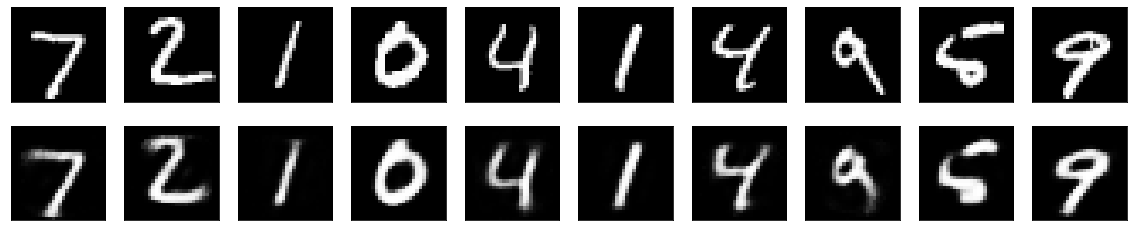

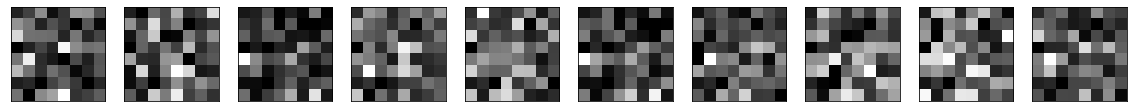

In [13]:
n=10
plt.figure(figsize=(20,4))

for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)


plt.show()

plt.figure(figsize=(20,4))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(encode_imgs[i].reshape(8,8))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Define Model

In [0]:
from keras.models import Sequential
model = Sequential()

model.add(Dense(128,activation='relu',input_dim=784))
model.add(Dense(64,activation='relu'))

model.add(Dense(128,activation='relu'))
model.add(Dense(784,activation='sigmoid'))

In [0]:
model.compile(optimizer='adadelta',loss='binary_crossentropy')

In [21]:
(x_train, _ ),(x_test, _) = mnist.load_data()

x_train =  x_train.astype('float32')/255
x_test =  x_test.astype('float32')/255
print(f'x_train shape = {x_train.shape}')
print(f'x_test shape = {x_test.shape}')


x_train = x_train.reshape((len(x_train), (np.prod(x_train.shape[1:]))))
x_test = x_test.reshape((len(x_test), (np.prod(x_test.shape[1:]))))
print(f'x_train shape = {x_train.shape}')
print(f'x_test shape = {x_test.shape}')

x_train shape = (60000, 28, 28)
x_test shape = (10000, 28, 28)
x_train shape = (60000, 784)
x_test shape = (10000, 784)


In [22]:
model.fit(x_train,x_train,epochs=50,batch_size=(256),shuffle=True,validation_data=(x_test,x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 6s 95us/step - loss: 0.3239 - val_loss: 0.2576
Epoch 2/50
60000/60000 [==============================] - 5s 90us/step - loss: 0.2411 - val_loss: 0.2221
Epoch 3/50
60000/60000 [==============================] - 5s 90us/step - loss: 0.2094 - val_loss: 0.1950
Epoch 4/50
60000/60000 [==============================] - 5s 91us/step - loss: 0.1880 - val_loss: 0.1789
Epoch 5/50
60000/60000 [==============================] - 5s 89us/step - loss: 0.1759 - val_loss: 0.1722
Epoch 6/50
60000/60000 [==============================] - 5s 90us/step - loss: 0.1676 - val_loss: 0.1613
Epoch 7/50
60000/60000 [==============================] - 5s 88us/step - loss: 0.1601 - val_loss: 0.1517
Epoch 8/50
60000/60000 [==============================] - 5s 86us/step - loss: 0.1532 - val_loss: 0.1491
Epoch 9/50
60000/60000 [==============================] - 5s 86us/step - loss: 0.1466 - val_loss: 0.1405
Epoch

In [0]:
out_images = model.predict(x_test,batch_size=256)

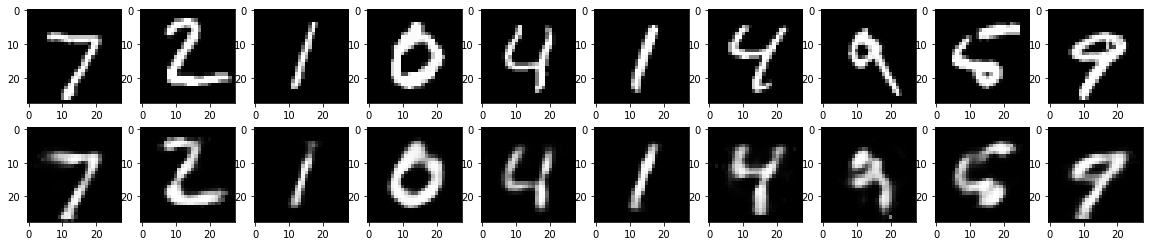

In [24]:
n=10
plt.figure(figsize=(20,4))

for i in range(n):
  ax = plt.subplot(2,n,i+1)
  plt.imshow(x_test[i].reshape(28,28))
  plt.gray()

  ax = plt.subplot(2,n,i+1+n)
  plt.imshow(out_images[i].reshape(28,28))
  plt.gray()

plt.show()

## Deep Autoencoder


In [4]:
input_img = Input(shape=(784,))
encoded = Dense(256,activation='relu')(input_img)
encoded = Dense(128,activation='relu')(encoded)
encoded = Dense(64,activation='relu')(encoded) #bottleneck

decoded = Dense(128,activation='relu')(encoded)
decoded = Dense(256,activation='relu')(decoded)
decoded = Dense(784,activation='sigmoid')(decoded)

autoencoder = Model(input_img,decoded)

encoder = Model(input_img, encoded)

encoded_input = Input(shape=(encoding_dim,))

decoder_layer = autoencoder.layers[-3](encoded_input)
decoder_layer = autoencoder.layers[-2](decoder_layer)
decoder_layer = autoencoder.layers[-1](decoder_layer)

decoder = Model(encoded_input, decoder_layer)

In [0]:
model.compile(optimizer='adadelta',loss='binary_crossentropy')

In [28]:
(x_train, _ ),(x_test, _) = mnist.load_data()

x_train =  x_train.astype('float32')/255
x_test =  x_test.astype('float32')/255
print(f'x_train shape = {x_train.shape}')
print(f'x_test shape = {x_test.shape}')


x_train = x_train.reshape((len(x_train), (np.prod(x_train.shape[1:]))))
x_test = x_test.reshape((len(x_test), (np.prod(x_test.shape[1:]))))
print(f'x_train shape = {x_train.shape}')
print(f'x_test shape = {x_test.shape}')

x_train shape = (60000, 28, 28)
x_test shape = (10000, 28, 28)
x_train shape = (60000, 784)
x_test shape = (10000, 784)


In [29]:
model.fit(x_train,x_train,epochs=50,batch_size=(256),shuffle=True,validation_data=(x_test,x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 6s 96us/step - loss: 0.1253 - val_loss: 0.1201
Epoch 2/50
60000/60000 [==============================] - 5s 88us/step - loss: 0.1246 - val_loss: 0.1348
Epoch 3/50
60000/60000 [==============================] - 5s 89us/step - loss: 0.1245 - val_loss: 0.1200
Epoch 4/50
60000/60000 [==============================] - 5s 88us/step - loss: 0.1245 - val_loss: 0.1376
Epoch 5/50
60000/60000 [==============================] - 5s 89us/step - loss: 0.1242 - val_loss: 0.1235
Epoch 6/50
60000/60000 [==============================] - 5s 87us/step - loss: 0.1238 - val_loss: 0.1161
Epoch 7/50
60000/60000 [==============================] - 5s 88us/step - loss: 0.1235 - val_loss: 0.1209
Epoch 8/50
60000/60000 [==============================] - 5s 88us/step - loss: 0.1236 - val_loss: 0.1223
Epoch 9/50
60000/60000 [==============================] - 5s 88us/step - loss: 0.1234 - val_loss: 0.1282
Epoch

In [0]:
out_images = model.predict(x_test,batch_size=256)

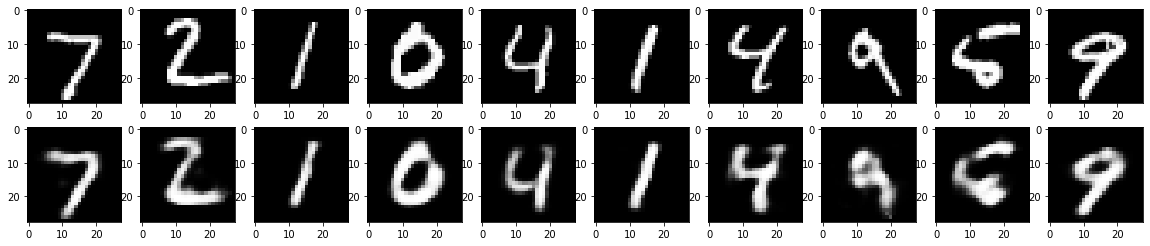

In [31]:

n=10
plt.figure(figsize=(20,4))

for i in range(n):
  ax = plt.subplot(2,n,i+1)
  plt.imshow(x_test[i].reshape(28,28))
  plt.gray()

  ax = plt.subplot(2,n,i+1+n)
  plt.imshow(out_images[i].reshape(28,28))
  plt.gray()

plt.show()

# Convolutional Auto Encoders


In [0]:
from keras.layers import Convolution2D,MaxPooling2D,UpSampling2D,Input

In [6]:
(x_train, _ ),(x_test, _) = mnist.load_data()

x_train =  x_train.astype('float32')/255
x_test =  x_test.astype('float32')/255
print(f'x_train shape = {x_train.shape}')
print(f'x_test shape = {x_test.shape}')


x_train = x_train.reshape((len(x_train),28,28,1) )
x_test = x_test.reshape((len(x_test),28,28,1))
print(f'x_train shape = {x_train.shape}')
print(f'x_test shape = {x_test.shape}')

11493376/11490434 [==============================] - 1s 0us/step
x_train shape = (60000, 28, 28)
x_test shape = (10000, 28, 28)
x_train shape = (60000, 28, 28, 1)
x_test shape = (10000, 28, 28, 1)


In [7]:
input = Input(shape=(28,28,1), name='input')
x  = Convolution2D(16, kernel_size=(3,3), padding='same', activation='relu', name='conv_1')(input)
x  = MaxPooling2D(pool_size=(2,2), padding='same')(x)
x  = Convolution2D(8, kernel_size=(3,3), padding='same', activation='relu', name='conv_2')(x)
x  = MaxPooling2D(pool_size=(2,2), padding='same')(x)
x  = Convolution2D(8, kernel_size=(3,3), padding='same', activation='relu', name='conv_3')(x)
x  = MaxPooling2D(pool_size=(2,2), padding='same')(x)

x  = Convolution2D(8, kernel_size=(3,3), padding='same', activation='relu', name='conv_4')(x)
x  = UpSampling2D(size=(2,2))(x)
x  = Convolution2D(8, kernel_size=(3,3), padding='same', activation='relu', name='conv_5')(x)
x  = UpSampling2D(size=(2,2))(x)
x  = Convolution2D(8, kernel_size=(3,3),  activation='relu', name='conv_6')(x)
x  = UpSampling2D(size=(2,2))(x)

output = Convolution2D(filters=1, kernel_size=(3,3), padding='same', activation='sigmoid', name = 'output' )(x)

In [8]:
model = Model(inputs=input, outputs=output, name='CAE')
model.compile(optimizer='adadelta',loss='binary_crossentropy')



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [9]:
model.summary()

Model: "CAE"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 28, 28, 1)         0         
_________________________________________________________________
conv_1 (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv_2 (Conv2D)              (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv_3 (Conv2D)              (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 8)           0       

In [11]:
model.fit(x_train,x_train,batch_size=32,epochs=20)

Epoch 1/20
60000/60000 [==============================] - 13s 210us/step - loss: 0.1182
Epoch 2/20
60000/60000 [==============================] - 12s 204us/step - loss: 0.1145
Epoch 3/20
60000/60000 [==============================] - 12s 206us/step - loss: 0.1119
Epoch 4/20
60000/60000 [==============================] - 12s 205us/step - loss: 0.1097
Epoch 5/20
60000/60000 [==============================] - 12s 205us/step - loss: 0.1079
Epoch 6/20
60000/60000 [==============================] - 12s 206us/step - loss: 0.1067
Epoch 7/20
60000/60000 [==============================] - 12s 205us/step - loss: 0.1053
Epoch 8/20
60000/60000 [==============================] - 12s 208us/step - loss: 0.1044
Epoch 9/20
60000/60000 [==============================] - 12s 205us/step - loss: 0.1035
Epoch 10/20
60000/60000 [==============================] - 12s 202us/step - loss: 0.1026
Epoch 11/20
60000/60000 [==============================] - 12s 203us/step - loss: 0.1021
Epoch 12/20
60000/60000 [=====

In [0]:
out_images = model.predict(x_test)

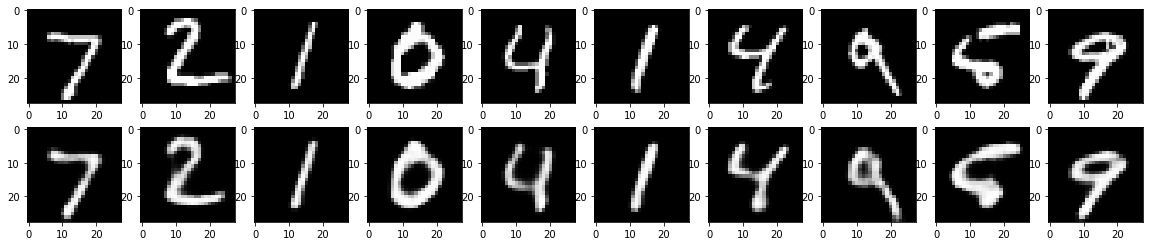

In [14]:

n=10
plt.figure(figsize=(20,4))

for i in range(n):
  ax = plt.subplot(2,n,i+1)
  plt.imshow(x_test[i].reshape(28,28))
  # plt.gray()

  ax = plt.subplot(2,n,i+1+n)
  plt.imshow(out_images[i].reshape(28,28))
  # plt.gray()

plt.show()